Análise dos dados

In [1]:
import pandas as pd
import sqlalchemy

# gráfico 
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
engine = sqlalchemy.create_engine("sqlite:///../data/database.db")

with open("./partidos_estado.sql", "r") as open_file:
    query = open_file.read()

df = pd.read_sql_query(query, engine)

# mostra as colunas do df
df.head()

,SG_PARTIDO,NM_PARTIDO,SG_UF,txGenFeminino,totalGenFeminino,txCorRacaPreta,totalCorRacaPreta,txCorRacaPretaParda,totalCorRacaPretaParda,txCorRacaNaoBranca,totalCorRacaNaoBranca,totalCandidatos
0,AGIR,AGIR,BR,0.343911,2536,0.137375,1013,0.587876,4335,0.602387,4442,7374
1,AVANTE,AVANTE,BR,0.338075,5585,0.130690,2159,0.599031,9896,0.615738,10172,16520
2,CIDADANIA,CIDADANIA,BR,0.367752,1852,0.125695,633,0.521247,2625,0.539515,2717,5036
3,DC,DEMOCRACIA CRISTÃ,BR,0.341606,2450,0.130786,938,0.571249,4097,0.588678,4222,7172
4,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,BR,0.336938,14988,0.093586,4163,0.478407,21281,0.492840,21923,44483


Plotando dados no gráfico

In [116]:
# 
txGenFeminino = df["totalGenFeminino"].sum() / df["totalCandidaturas"].sum()
txCorRacaPreta = df["totalCorRacaPreta"].sum() / df["totalCandidaturas"].sum()
txCorRacaNaoBranca = df["totalCorRacaNaoBranca"].sum() / df["totalCandidaturas"].sum()
txCorRacaPretaParda = df["totalCorRacaPretaParda"].sum() / df["totalCandidaturas"].sum()

IA para visualização de dados

In [117]:
from sklearn import cluster

In [118]:
model = cluster.KMeans(n_clusters=5)

x = df[["txGenFemininoBR", "txCorRacaPretaBR"]]

model.fit(x)
df["clusterBr"] = model.labels_

In [119]:
df.groupby(["clusterBr"])["txGenFemininoBR"].count()

clusterBr
0    12
1     3
2     1
3     1
4    12
Name: txGenFemininoBR, dtype: int64

/tmp/ipykernel_549218/1225328229.py:2: UserWarning: 
The sizes list has fewer values (2) than needed (29) and will cycle, which may produce an uninterpretable plot.
  sn.scatterplot(data=df,


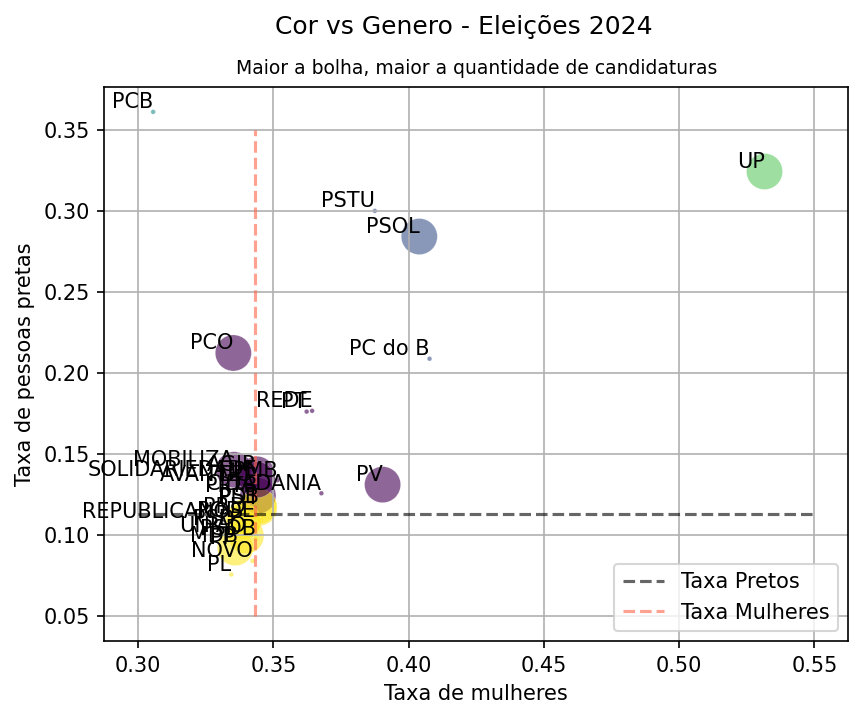

In [124]:
plt.figure(dpi=150)
sn.scatterplot(data=df, 
               x="txGenFemininoBR", 
               y="txCorRacaPretaBR",
               hue='clusterBr',
               size='totalCandidaturas',
               sizes=[5,300],
               palette='viridis',
               alpha=0.6)
    

# adicionando anotações com o nome dos partidos
for i in df['SG_PARTIDO']:
    # cordenadas
    data = df[df['SG_PARTIDO']==i]
    x = float(data['txGenFemininoBR'].iloc[0])
    y = float(data['txCorRacaPretaBR'].iloc[0])
    plt.annotate(i, (x, y), ha="right", va="bottom")

plt.grid(True)
# superior title
plt.suptitle("Cor vs Genero - Eleições 2024")
# title
plt.title("Maior a bolha, maior a quantidade de candidaturas", fontdict={"size": 9})
plt.xlabel("Taxa de mulheres")
plt.ylabel("Taxa de pessoas pretas")

# desenho das linhas (média de pessoas pretas)
plt.hlines(y=txCorRacaPreta, xmin = 0.3, xmax=0.55, colors='black', alpha=0.6, linestyles="--", label="Taxa Pretos")
plt.vlines(x=txGenFeminino, ymin = 0.05, ymax=0.35, colors='tomato', alpha=0.6, linestyles="--", label="Taxa Mulheres")

# legenda do gráfico
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[36:]
labels = labels[36:]

plt.legend(handles=handles, labels=labels)
# salvando a imagem
plt.savefig("../img/partidos_cor_raca_genero_agrupado_tamanho_bolha.png")